### Doing some experimentation with librosa on my own recordings and a pre-recorded Blackfoot clip

In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

## Amplitude Normalization

In [109]:
from pydub import AudioSegment

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

In [110]:
audio_fish = AudioSegment.from_file('fish.wav')
normalized_fish = match_target_amplitude(audio_fish, -20.0)

In [112]:
audio_user = AudioSegment.from_file('water.wav')
normalized_user = match_target_amplitude(audio_user, -20.0)

In [119]:
audio_user = AudioSegment.from_file('inthemorning.wav')
normalized_user = match_target_amplitude(audio_user, -20.0)

## Processing fft and spectrograms

#### Convert to librosa format

In [113]:
fish_samples = normalized_fish.get_array_of_samples()
arr = np.array(fish_samples).astype(np.float32)/32768 # 16 bit 
fish_librosa = librosa.core.resample(arr, sound.frame_rate, 22050, res_type='kaiser_best')

In [120]:
fish_user_samples = normalized_user.get_array_of_samples()
arr = np.array(fish_user_samples).astype(np.float32)/32768 # 16 bit 
fish_user_librosa = librosa.core.resample(arr, sound.frame_rate, 22050, res_type='kaiser_best')

In [115]:
fish_librosa

array([-0.07608107, -0.10554907, -0.0913776 , ...,  0.01461184,
        0.01425947,  0.01443727], dtype=float32)

In [121]:
fish_user_librosa

array([-0.01967477, -0.02837595, -0.02480396, ...,  0.0052338 ,
        0.00546326,  0.0051015 ], dtype=float32)

In [117]:
np.save('fish_vector', fish_librosa)

In [122]:
np.save('inthemorning_vector', fish_user_librosa)

#### pad 0's for same length

In [92]:
length_fish = len(fish_librosa)
length_user = len(fish_user_librosa)

In [93]:
length_fish

19467

In [94]:
length_user

44032

In [95]:
if len(fish_librosa) > len(fish_user_librosa):
    pad = length_fish - length_user
    fish_user_librosa = np.pad(fish_user_librosa, (0,pad), 'constant')
else:
    pad = length_user - length_fish
    fish_librosa =np.pad(fish_librosa, (0,pad), 'constant')
    

In [96]:
len(fish_librosa)

44032

In [97]:
len(fish_user_librosa)

44032

In [98]:
# number of samples per fft (window)
n_fft = 2048

# amount we are shifting each fourier transform to the right
# 512 samples to the right
hop_length = 512

# short term ft
# stft -> spectrogram
stft_fish = librosa.core.stft(fish_librosa, hop_length=hop_length, n_fft=n_fft)
spectrogram_fish = np.abs(stft_fish)

In [99]:
# number of samples per fft (window)
n_fft = 2048

# amount we are shifting each fourier transform to the right
# 512 samples to the right
hop_length = 512

# short term ft
# stft -> spectrogram
stft_user_fish = librosa.core.stft(fish_user_librosa, hop_length=hop_length, n_fft=n_fft)
spectrogram_user_fish = np.abs(stft_user_fish)

In [100]:
spectrogram_fish.shape

(1025, 87)

In [101]:
spectrogram_user_fish.shape

(1025, 87)

In [102]:
from scipy import spatial

In [103]:
spec = spectrogram_fish.flatten()
spec2 = spectrogram_user_fish.flatten()


result = 1 - spatial.distance.cosine(spec, spec2)
print(result)

0.31994301080703735


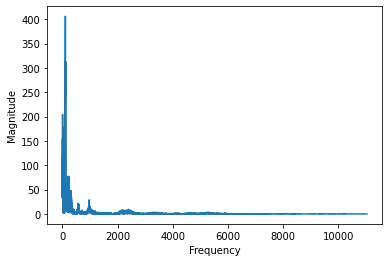

In [106]:
# fft -> spectrum
fft = np.fft.fft(fish_librosa)
# magnitude indicates the contribution of the frequency to
# the overall sound
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

# first half of frequency/magnitude array
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude_fish = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude_fish)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [108]:
spatial.distance.cosine(left_magnitude_fish, left_magnitude)

0.43056775483577536

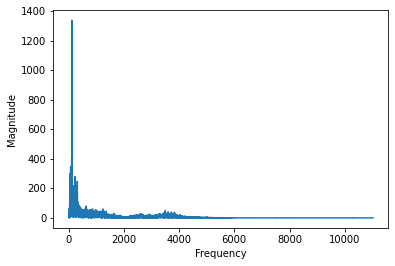

In [107]:
# fft -> spectrum
fft = np.fft.fft(fish_user_librosa)
# magnitude indicates the contribution of the frequency to
# the overall sound
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

# first half of frequency/magnitude array
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [37]:
# makes the heat map much more interpretable
log_spectrogram_fish = librosa.amplitude_to_db(spectrogram_fish)

In [38]:
# makes the heat map much more interpretable
log_spectrogram_user_fish = librosa.amplitude_to_db(spectrogram_user_fish)

In [39]:
log_spectrogram_fish

array([[ 18.416283 ,  23.488882 ,  23.498737 , ...,  19.285198 ,
         18.071821 ,  10.184645 ],
       [  7.5512657,  22.674501 ,  21.145939 , ...,  19.364246 ,
         15.805784 , -14.354996 ],
       [ 21.064909 ,  16.851786 ,  13.182955 , ...,  16.432243 ,
          7.1565247,   7.861871 ],
       ...,
       [-22.715542 , -28.731266 , -39.33456  , ..., -39.33456  ,
        -39.33456  , -39.33456  ],
       [-22.717625 , -28.740417 , -39.33456  , ..., -39.33456  ,
        -39.33456  , -39.33456  ],
       [-22.720306 , -28.741154 , -39.33456  , ..., -39.33456  ,
        -39.33456  , -39.33456  ]], dtype=float32)

In [40]:
log_spectrogram_user_fish

array([[-34.198463, -27.94186 , -34.198463, ..., -34.198463, -34.198463,
        -32.94636 ],
       [-34.198463, -27.40992 , -21.025564, ..., -34.198463, -34.198463,
        -34.198463],
       [-34.198463, -26.017542, -11.000643, ..., -30.225643, -34.198463,
        -34.198463],
       ...,
       [-34.198463, -34.198463, -34.198463, ..., -34.198463, -34.198463,
        -34.198463],
       [-34.198463, -34.198463, -34.198463, ..., -34.198463, -34.198463,
        -34.198463],
       [-34.198463, -34.198463, -34.198463, ..., -34.198463, -34.198463,
        -34.198463]], dtype=float32)

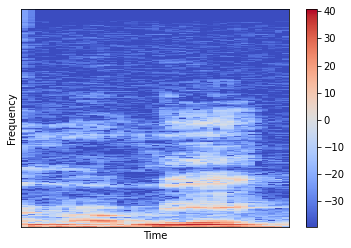

In [41]:
# similar to a heat map
# color represents amplitude in dicibels
librosa.display.specshow(log_spectrogram_fish, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

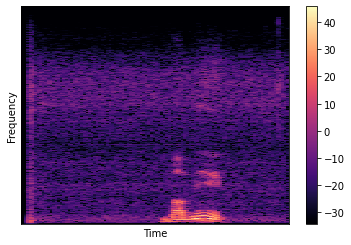

In [42]:
# similar to a heat map
# color represents amplitude in dicibels
librosa.display.specshow(log_spectrogram_user_fish, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()